In [30]:
import graph_tool as gt
import graph_tool.generation as gtg
import graph_tool.draw as gtd
import graph_tool.stats as gts
import numpy as np
import random


#project in hilbert space
def phi_deg(G : gt.Graph):
    """given graph, returns 0 to 10th normalizeddegree distribution"""
    dist = gts.vertex_hist(G, "total")[0][0:9]
    normalized = dist / dist.sum()
    return normalized

def phi_sp(G : gt.Graph):
    """given graph, returns 0 to 30th normalized shortest path distribution"""
    dist = gts.distance_histogram(G)[0][0:9]
    normalized = dist / dist.sum()
    return normalized

def kernel_sp(Gi : gt.Graph, Gj : gt.Graph):
    return np.dot(phi_sp(Gi), phi_sp(Gj))


#data and labels
s = 13
f = 4
data1 = [gtg.lattice([s + random.randint(-f,f),s + random.randint(-f,f)]) for i in range(10)]
data2 = [gtg.lattice([s + random.randint(-f,f),s + random.randint(-f,f)], periodic = True) for i in range(10)]
data = np.concatenate((data1, data2))
data = np.array(data, dtype = object)
n = len(data)
labels = np.concatenate(([-1 for i in range(10)], [1 for i in range(10)]))

#project all graphs with phi degree kernel
all_phi = []
for g in data:
    all_phi.append(phi_sp(g))
all_phi = np.array(all_phi)

#kernel matrix shortest path

K = np.zeros((n,n))
for i in range(20):
    for j in range(20):
        K[i][j] = kernel_sp(data[i], data[j])
K_sp = K

0 -th graph of type -1


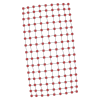

1 -th graph of type -1


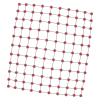

2 -th graph of type -1


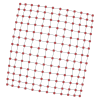

3 -th graph of type -1


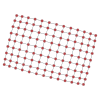

4 -th graph of type -1


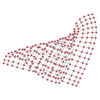

5 -th graph of type -1


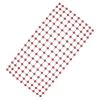

6 -th graph of type -1


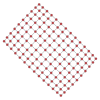

7 -th graph of type -1


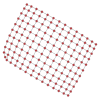

8 -th graph of type -1


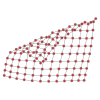

9 -th graph of type -1


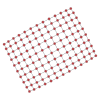

10 -th graph of type 1


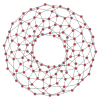

11 -th graph of type 1


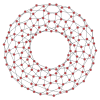

12 -th graph of type 1


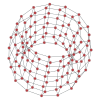

13 -th graph of type 1


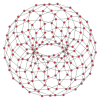

14 -th graph of type 1


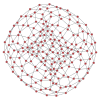

15 -th graph of type 1


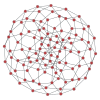

16 -th graph of type 1


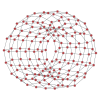

17 -th graph of type 1


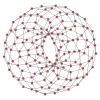

18 -th graph of type 1


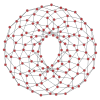

19 -th graph of type 1


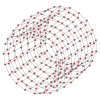

In [14]:
for i in range(20):
    print(i,"-th graph of type",labels[i])
    gtd.graph_draw(data[i], output_size = (100,100))

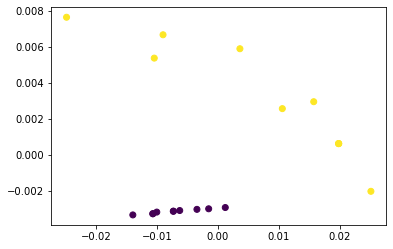

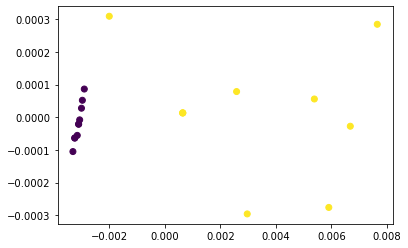

In [19]:
#kernel pca three components of shortest path kerenl

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
pca.fit(K)
boloss = pca.fit_transform(K) #kernel matrix as entry

plt.figure()
plt.scatter(boloss[:,0], boloss[:,1], c = labels)
plt.figure()
plt.scatter(boloss[:,1], boloss[:,2], c = labels)

In [40]:
#binary classfication using degree kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = labels
X = K
svm = SVC(kernel='precomputed').fit(X, y)
#y_pred = svm.predict( )